In [1]:
import pandas as pd # type: ignore
Customers_df=pd.read_csv('data/Customers.csv', encoding='ISO-8859-1')
Exchange_rates_df=pd.read_csv('data/Exchange_Rates.csv', encoding='ISO-8859-1')
Products_df=pd.read_csv('data/Products.csv', encoding='ISO-8859-1')
Sales_df=pd.read_csv('data/Sales.csv', encoding='ISO-8859-1')
Stores_df=pd.read_csv('data/Stores.csv', encoding='ISO-8859-1')

# **1. Data Cleaning**

####     1. Customer Table

In [2]:
Customers_df.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965


In [3]:
Customers_df.iloc[6482]

CustomerKey                897445
Gender                       Male
Name           Billie van Krugten
City                       Bussum
State Code                     NH
State               Noord-Holland
Zip Code                  1404 JM
Country               Netherlands
Continent                  Europe
Birthday                10/7/1977
Name: 6482, dtype: object

In [4]:
Customers_df['Zip Code']=Customers_df['Zip Code'].apply(str)

In [5]:
Customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [6]:
#converting Birthday column datatype as Datetime object
Customers_df['Birthday']=pd.to_datetime(Customers_df['Birthday'],format='%m/%d/%Y').dt.date
Customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [7]:
#Checking null values
Customers_df.isnull().sum()

CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64

In [8]:
#Droping duplicates
Customers_df.drop_duplicates(inplace=True)

In [9]:
#Dropping Null Values
Customers_df.dropna(inplace=True)
Customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15256 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15256 non-null  int64 
 1   Gender       15256 non-null  object
 2   Name         15256 non-null  object
 3   City         15256 non-null  object
 4   State Code   15256 non-null  object
 5   State        15256 non-null  object
 6   Zip Code     15256 non-null  object
 7   Country      15256 non-null  object
 8   Continent    15256 non-null  object
 9   Birthday     15256 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.3+ MB


#### 2. Exchange Rates

In [10]:
Exchange_rates_df.head()

,Date,Currency,Exchange
0,1/1/2015,USD,1.0000
1,1/1/2015,CAD,1.1583
2,1/1/2015,AUD,1.2214
3,1/1/2015,EUR,0.8237
4,1/1/2015,GBP,0.6415


In [11]:
#drop null values
Exchange_rates_df.dropna(inplace=True)

In [12]:
#drop duplicates
Exchange_rates_df.drop_duplicates(inplace=True)

In [13]:
#Converting Date column into Datetime object
Exchange_rates_df['Date']=pd.to_datetime(Exchange_rates_df['Date'],format='%m/%d/%Y').dt.date
Exchange_rates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      11215 non-null  object 
 1   Currency  11215 non-null  object 
 2   Exchange  11215 non-null  float64
dtypes: float64(1), object(2)
memory usage: 263.0+ KB


#### 3.Products 

In [14]:
Products_df.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio


In [15]:
#Checking null values and data types
Products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


In [16]:
#Removing $ from  Unit cost USD column and Unit price USD and convert it's data types
Products_df['Unit Cost USD']=Products_df['Unit Cost USD'].str.strip('$')
Products_df['Unit Price USD']=Products_df['Unit Price USD'].str.strip('$')

Products_df['Unit Cost USD']=Products_df['Unit Cost USD'].str.replace(',','')
Products_df['Unit Price USD']=Products_df['Unit Price USD'].str.replace(',','')


Products_df['Unit Cost USD']=Products_df['Unit Cost USD'].astype(float)
Products_df['Unit Price USD']=Products_df['Unit Price USD'].astype(float)
Products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ProductKey      2517 non-null   int64  
 1   Product Name    2517 non-null   object 
 2   Brand           2517 non-null   object 
 3   Color           2517 non-null   object 
 4   Unit Cost USD   2517 non-null   float64
 5   Unit Price USD  2517 non-null   float64
 6   SubcategoryKey  2517 non-null   int64  
 7   Subcategory     2517 non-null   object 
 8   CategoryKey     2517 non-null   int64  
 9   Category        2517 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 196.8+ KB


In [17]:
#drop null values
Products_df.dropna(inplace=True)

In [18]:
#drop duplicates
Products_df.drop_duplicates(inplace=True)

In [19]:
Products_df.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,6.62,12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,7.40,14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,11.00,21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,11.00,21.57,101,MP4&MP3,1,Audio


#### 4. Sales

In [20]:
Sales_df.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD


In [21]:
Sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


In [22]:
#Converting data types and fill null values
Sales_df['Delivery Date']=pd.to_datetime(Sales_df['Delivery Date'],format='%m/%d/%Y').dt.date
Sales_df['Order Date']=pd.to_datetime(Sales_df['Order Date'],format='%m/%d/%Y').dt.date
Sales_df['Delivery Date']=Sales_df['Delivery Date'].fillna(0)
Sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  62884 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


In [106]:
#convert date time for table
Sales_df['Delivery Date']=pd.to_datetime(Sales_df['Delivery Date'])
Sales_df['Order Date']=pd.to_datetime(Sales_df['Order Date'])

In [23]:
#drop null values
Sales_df.dropna(inplace=True)

In [24]:
#drop duplicates
Sales_df.drop_duplicates(inplace=True)

#### 5. Stores

In [25]:
Stores_df.head()

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015


In [26]:
Stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  66 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


In [27]:
#Convert the Open Date column's data type
Stores_df['Open Date']=pd.to_datetime(Stores_df['Open Date'],format='%m/%d/%Y').dt.date
Stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  66 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


In [28]:
Stores_df[Stores_df['Square Meters'].isna()]

,StoreKey,Country,State,Square Meters,Open Date
66,0,Online,Online,NaN,2010-01-01


In [29]:
Sales_df[Sales_df['StoreKey']==0]

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD
5,366002,3,2016-01-01,2016-01-12,266019,0,1080,4,CAD
...,...,...,...,...,...,...,...,...,...
62878,2243029,6,2021-02-20,2021-02-27,887764,0,1456,2,EUR
62880,2243031,1,2021-02-20,2021-02-24,511229,0,98,4,EUR
62881,2243032,1,2021-02-20,2021-02-23,331277,0,1613,2,CAD
62882,2243032,2,2021-02-20,2021-02-23,331277,0,1717,2,CAD


In [30]:
Sales_df.groupby('StoreKey').agg({'ProductKey':'count'})

,ProductKey
StoreKey,
0,13165
1,292
2,18
4,431
5,892
6,615
8,1360
9,1577
10,1269


In [31]:
#fill null values
Sales_df=Sales_df.fillna(0)
Sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  62884 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


In [32]:
#drop duplicates
Stores_df.drop_duplicates(inplace=True)

#   2.**EDA**

In [33]:
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

## **1. Products**

#### 1. Sales analysis over by Category

In [34]:
Products_Sales=pd.merge(Products_df,Sales_df,how='inner',on='ProductKey')
Products_Sales.head(1)

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,Quantity,Currency Code
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101,MP4&MP3,1,Audio,493001,3,2016-05-07,2016-05-14,453993,0,1,EUR


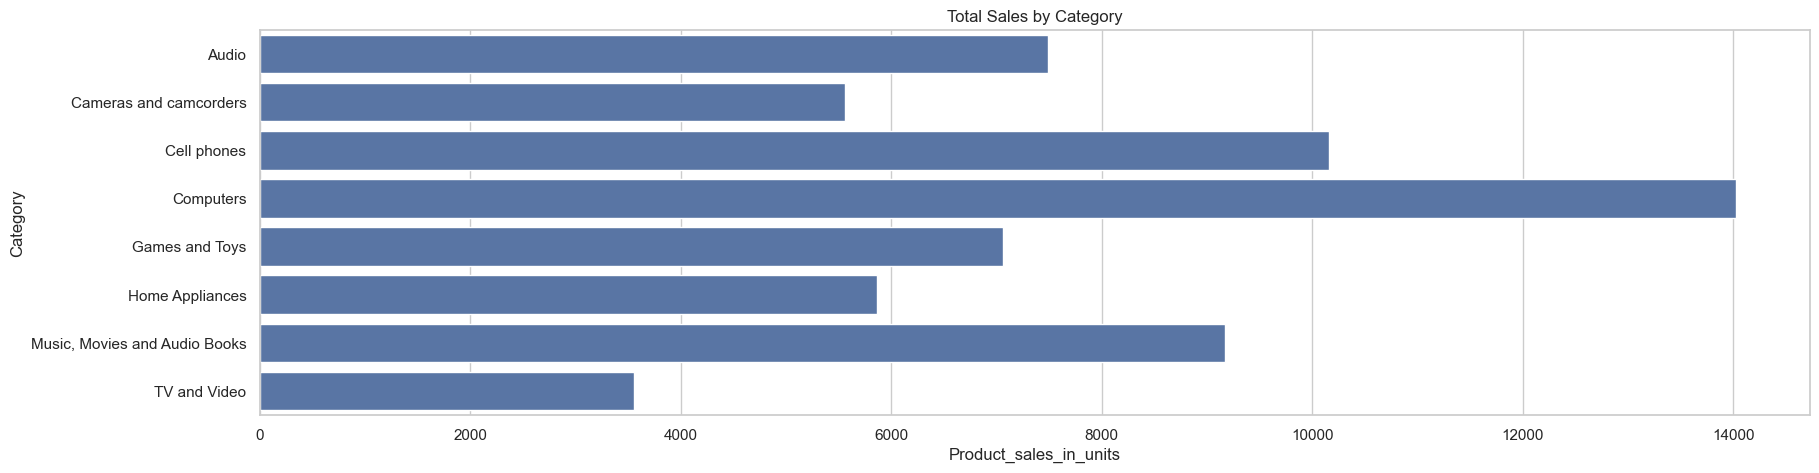

In [35]:
Sales_by_Category = Products_Sales.groupby('Category').agg(Product_sales_in_units=('Category','count')).reset_index()
plt.figure(figsize=(20,5))
sns.set_theme(style='whitegrid')
sns.barplot(Sales_by_Category,x='Product_sales_in_units',y='Category')
plt.title('Total Sales by Category')
plt.show()

#### 2. Sales analysis over by profitable category

In [36]:
Products_Sales['Profit']=Products_Sales['Unit Price USD']-Products_Sales['Unit Cost USD']
Products_Sales.head(1)

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,Quantity,Currency Code,Profit
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101,MP4&MP3,1,Audio,493001,3,2016-05-07,2016-05-14,453993,0,1,EUR,6.37


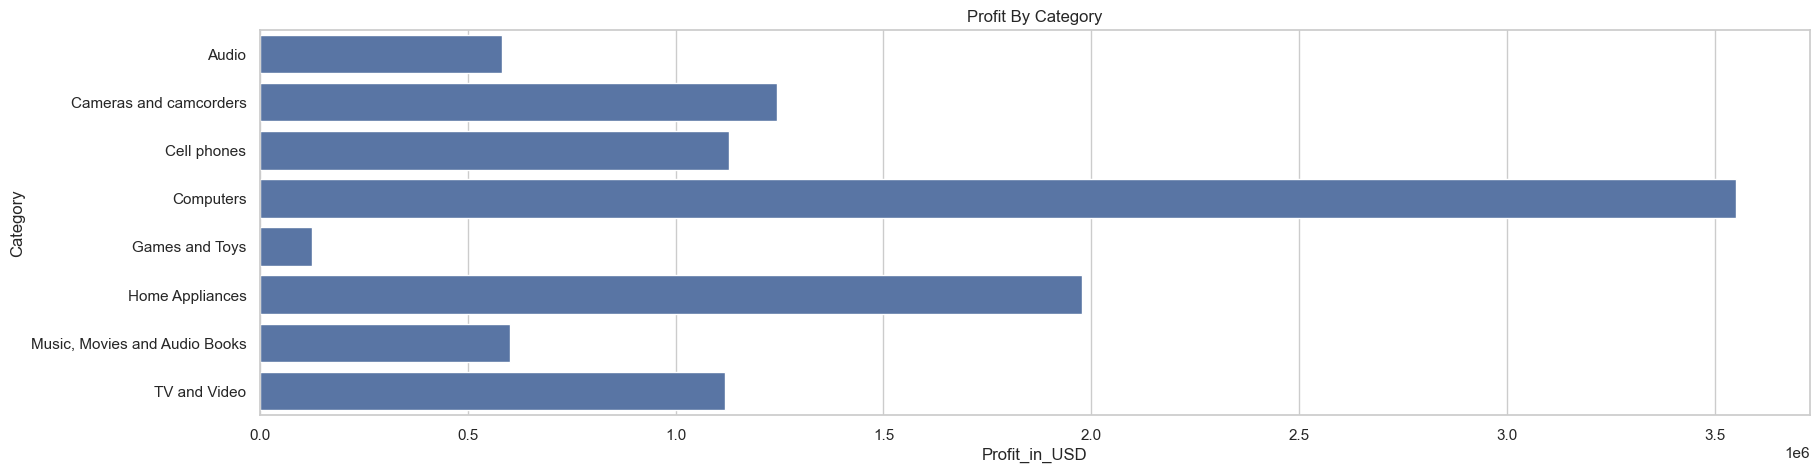

In [37]:
Profit_by_category=Products_Sales.groupby('Category').agg(Profit_in_USD=('Profit','sum')).reset_index()
plt.figure(figsize=(20,5))
sns.set_theme(style='whitegrid')
sns.barplot(Profit_by_category,x='Profit_in_USD',y='Category')
plt.title('Profit By Category')
plt.show()

In [38]:
Profit_by_category

,Category,Profit_in_USD
0,Audio,583859.06
1,Cameras and camcorders,1244672.64
2,Cell phones,1128935.55
3,Computers,3549191.65
4,Games and Toys,125262.54
5,Home Appliances,1978211.56
6,"Music, Movies and Audio Books",603267.22
7,TV and Video,1119499.64


#### 3. Most and least sales product

In [39]:
Total_units_by_product = Products_Sales.groupby('Product Name').agg(Total_units=("ProductKey",'count')).reset_index()
Total_units_by_product.head(1)

,Product Name,Total_units
0,A. Datum Advanced Digital Camera M300 Azure,11


In [40]:
#Most sold product
Top_perform=Total_units_by_product[Total_units_by_product['Total_units']==Total_units_by_product['Total_units'].max()]
Top_perform

,Product Name,Total_units
240,Adventure Works Desktop PC2.30 MD230 Black,162


In [41]:
#Least sold Product
Least_perform=Total_units_by_product[Total_units_by_product['Total_units']==Total_units_by_product['Total_units'].min()]
Least_perform

,Product Name,Total_units
189,Adventure Works Chandelier M6150 Grey,1
190,Adventure Works Chandelier M6150 Silver,1
191,Adventure Works Chandelier M6150 White,1
192,Adventure Works Chandelier M8150 Black,1
195,Adventure Works Chandelier M8150 Silver,1
196,Adventure Works Chandelier M8150 White,1
225,Adventure Works Desk Lamp E1300 Black,1
254,Adventure Works Floor Lamp X1150 Blue,1
622,Contoso Home Theater System 4.1 Channel M1400 ...,1
623,Contoso Home Theater System 4.1 Channel M1400 ...,1


## **2. Customer Analysis**

#### 1. Sales depends Customers age

In [42]:
Customers_df.head(1)

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03


In [43]:
Sales_df.head(1)

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,2016-01-01,0,265598,10,1304,1,CAD


In [44]:
Sales_Customer=pd.merge(Sales_df,Customers_df,how='inner',on='CustomerKey')

In [45]:
Sales_Customer.head(1)

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,366000,1,2016-01-01,0,265598,10,1304,1,CAD,Male,Tyler Vaught,London,ON,Ontario,N5W 5K6,Canada,North America,1971-03-23


In [46]:
Sales_Customer['Order Date']=pd.to_datetime(Sales_Customer['Order Date'])
Sales_Customer['Birthday']=pd.to_datetime(Sales_Customer['Birthday'])
Sales_Customer['Customer_Age']=(Sales_Customer['Order Date']-Sales_Customer['Birthday']).dt.days//365.25

In [47]:
Sales_Customer.head(1)

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday,Customer_Age
0,366000,1,2016-01-01,0,265598,10,1304,1,CAD,Male,Tyler Vaught,London,ON,Ontario,N5W 5K6,Canada,North America,1971-03-23,44.0


In [48]:
Sales_Customer_Product=pd.merge(Sales_Customer,Products_df,how='inner',on='ProductKey')
Sales_Customer_Product.head(1)

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Gender,...,Customer_Age,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,366000,1,2016-01-01,0,265598,10,1304,1,CAD,Male,...,44.0,Contoso Lens Adapter M450 White,Contoso,White,31.27,68.0,406,Cameras & Camcorders Accessories,4,Cameras and camcorders


In [49]:
Customer_Age_based_Sales=Sales_Customer_Product.groupby('Customer_Age').agg(Products=('Order Number','count'),Revenue=('Unit Price USD','sum')).reset_index()
Customer_Age_based_Sales.head(1)

,Customer_Age,Products,Revenue
0,14.0,45,11450.28


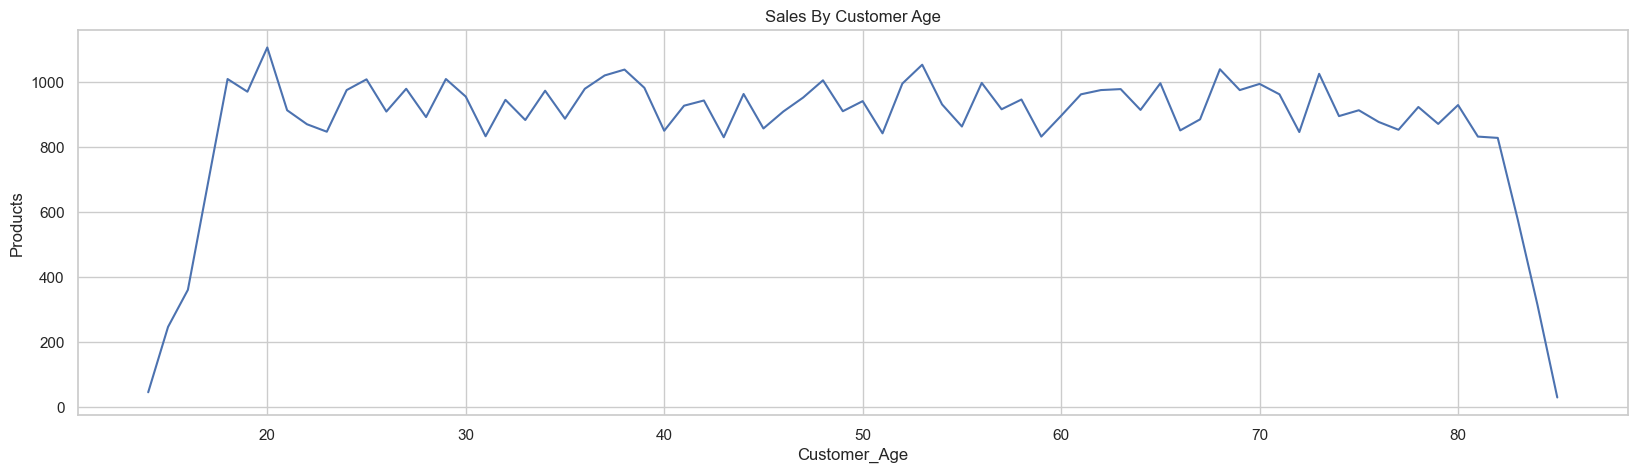

In [50]:
#Sales per customer age
plt.figure(figsize=(20,5))
sns.set_theme(style='whitegrid')
sns.lineplot(Customer_Age_based_Sales,y='Products',x='Customer_Age')
plt.title('Sales By Customer Age')
plt.show()

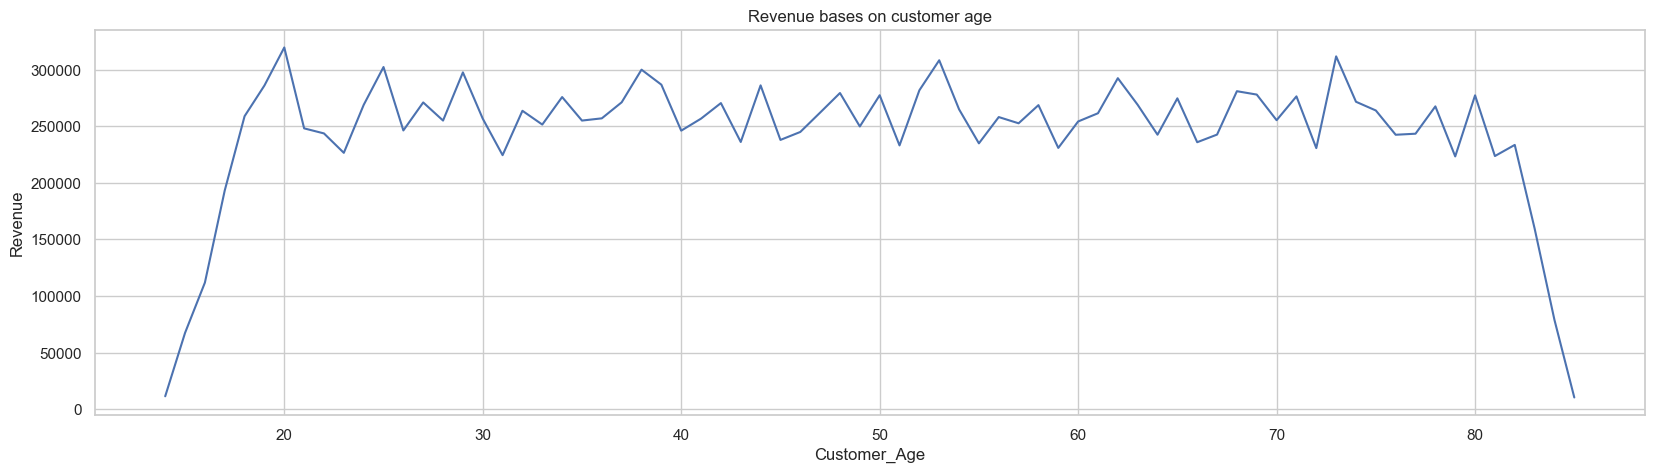

In [51]:
#Revenue per Custome Age
plt.figure(figsize=(20,5))
sns.set_theme(style='whitegrid')
sns.lineplot(Customer_Age_based_Sales,x='Customer_Age',y='Revenue')
plt.title('Revenue bases on customer age')
plt.show()

#### 2. Product Sales depends gender

In [52]:
Sales_Gender=Sales_Customer_Product.groupby('Gender').agg(Sales=('Order Number','count'),Revenue=('Unit Price USD','sum')).reset_index()
Sales_Gender

,Gender,Sales,Revenue
0,Female,31067,8697629.02
1,Male,31787,8937050.64


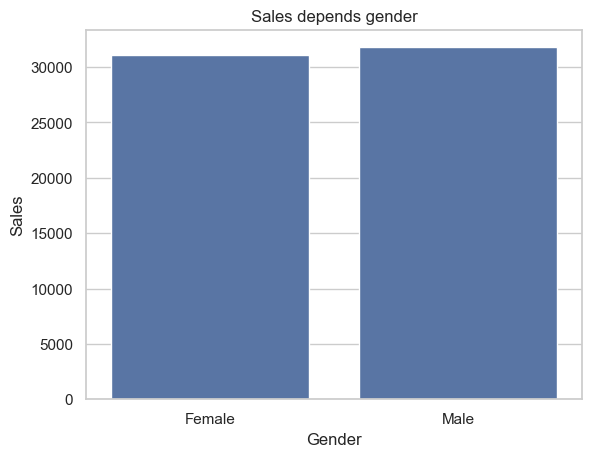

In [53]:
#Sales depends gender
sns.set_theme(style='whitegrid')
sns.barplot(Sales_Gender,x='Gender',y='Sales')
plt.title('Sales depends gender')
plt.show()

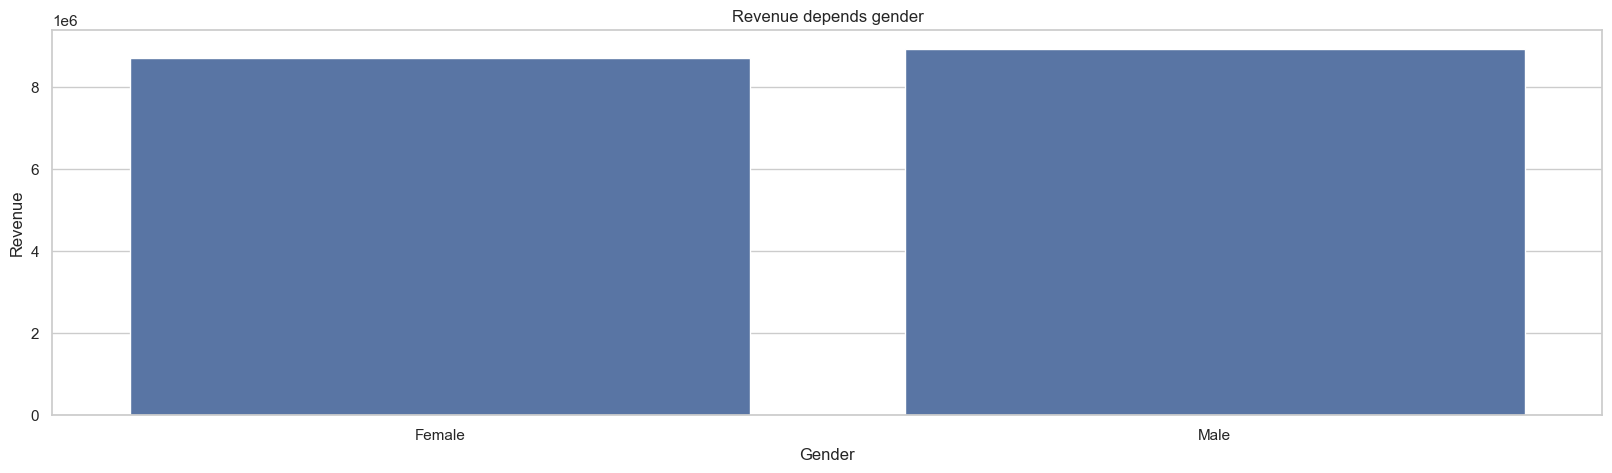

In [54]:
#Revenue depends gender
plt.figure(figsize=(20,5))
sns.set_theme(style='whitegrid')
sns.barplot(Sales_Gender,x='Gender',y='Revenue')
plt.title('Revenue depends gender')
plt.show()

#### 3. Sales depends customer location

In [55]:
Sales_Customer_Product['Country'].unique()

array(['Canada', 'United States', 'United Kingdom', 'Netherlands',
       'Italy', 'France', 'Germany', 'Australia'], dtype=object)

In [56]:
#Sales revenue groupby country 
Sales_country=Sales_Customer_Product.groupby('Country').agg(Sales=('Order Number','count'),Revenue=('Unit Price USD','sum')).reset_index()
Sales_country

,Country,Sales,Revenue
0,Australia,2941,849351.15
1,Canada,5415,1514162.06
2,France,1730,488054.16
3,Germany,5956,1651714.92
4,Italy,2655,778097.22
5,Netherlands,2250,609624.60
6,United Kingdom,8140,2277155.48
7,United States,33767,9466520.07


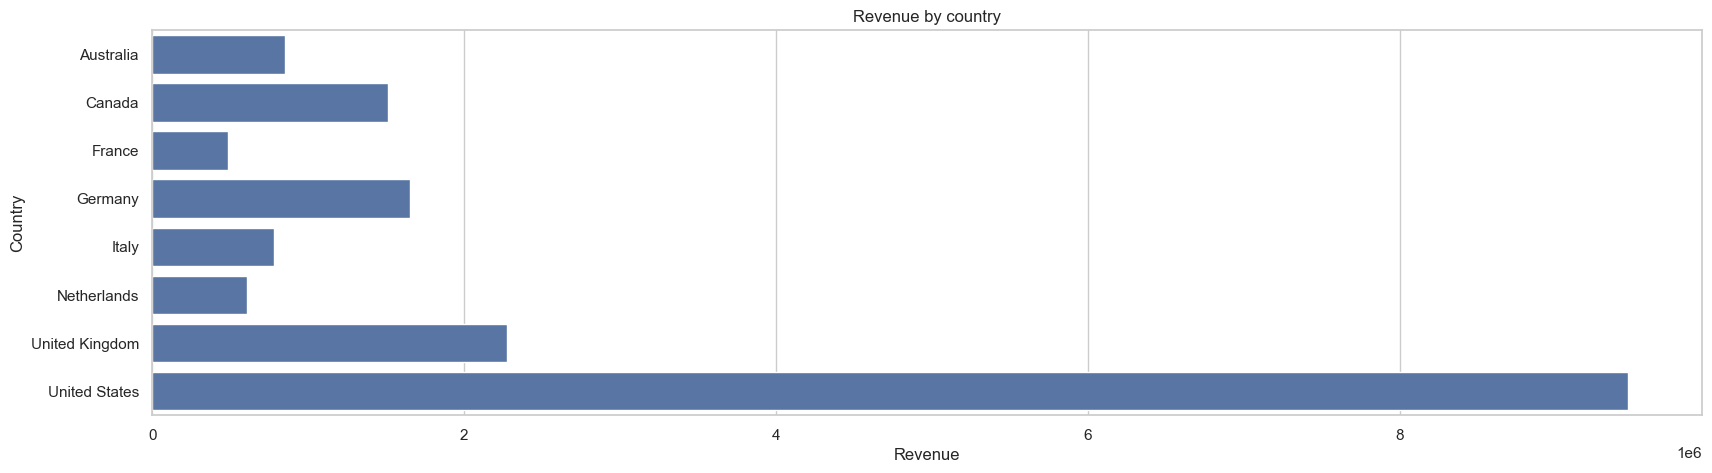

In [57]:
#Revenue by Country
plt.figure(figsize=(20,5))
sns.set_theme(style='whitegrid')
sns.barplot(Sales_country,x='Revenue',y='Country')
plt.title('Revenue by country')
plt.show()

#### 4. Purchase Patterns

In [58]:
#take customer_sales_product df
Sales_Customer_Product.head(1)

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Gender,...,Customer_Age,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,366000,1,2016-01-01,0,265598,10,1304,1,CAD,Male,...,44.0,Contoso Lens Adapter M450 White,Contoso,White,31.27,68.0,406,Cameras & Camcorders Accessories,4,Cameras and camcorders


In [59]:
Purchase_frequency=Sales_Customer_Product.groupby(['Brand','Gender']).agg(Order_value=('Order Number','count')).reset_index()
Purchase_frequency

,Brand,Gender,Order_value
0,A. Datum,Female,938
1,A. Datum,Male,895
2,Adventure Works,Female,3145
3,Adventure Works,Male,3233
4,Contoso,Female,7922
5,Contoso,Male,8020
6,Fabrikam,Female,1763
7,Fabrikam,Male,1795
8,Litware,Female,821
9,Litware,Male,841


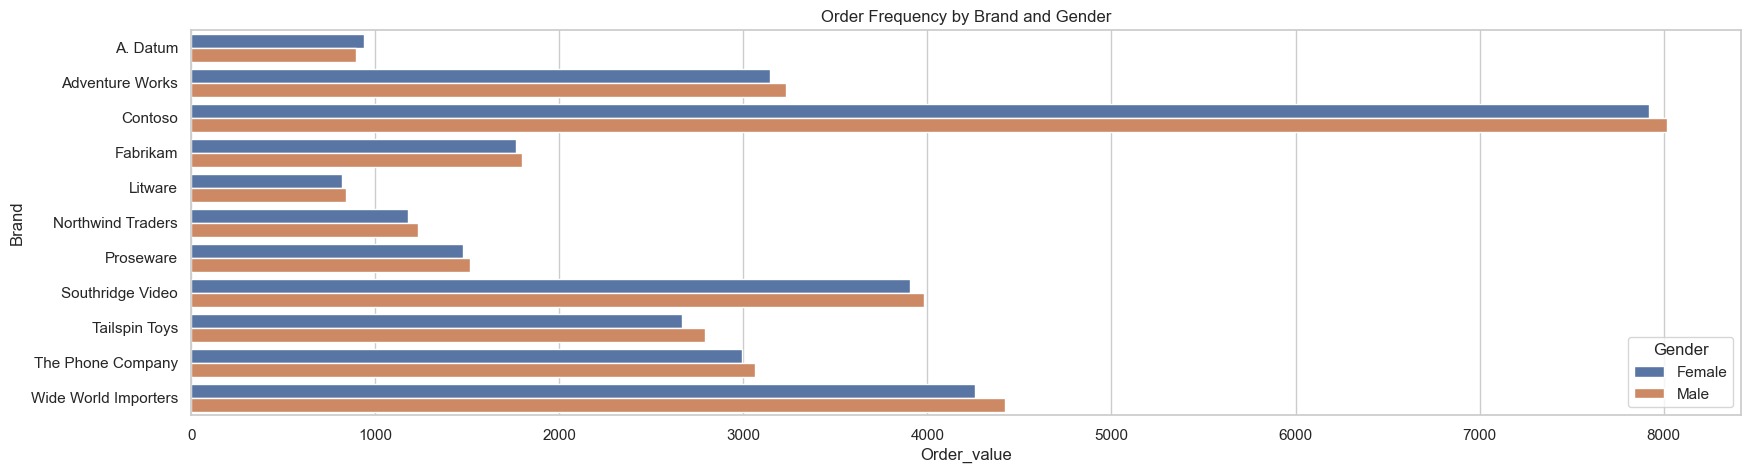

In [60]:
#plot to find the frequency by gender and brand
plt.figure(figsize=(20,5))
sns.set_theme(style='whitegrid')
plotte=sns.barplot(Purchase_frequency,x='Order_value',y='Brand',hue='Gender')
plt.title('Order Frequency by Brand and Gender')
plt.show()

#### 5. Preferred Products for customers

In [61]:
#Preferred product for customer from brand
preferred_products=Sales_Customer_Product.groupby(['Brand','Product Name']).agg(Max_sales=('ProductKey','max')).reset_index().sort_values(['Max_sales','Brand'],ascending=False).drop_duplicates(subset='Brand',keep='first')
preferred_products

,Brand,Product Name,Max_sales
665,Contoso,Contoso In-Line Coupler E180 Silver,2517
1315,Litware,Litware 18'' Oscillating Pedestal Fan M145 White,2487
1613,Proseware,Proseware Air conditioner 6000BTU E180 Grey,2409
2355,Wide World Importers,WWI Desk Lamp E120 Blue,2269
226,Adventure Works,Adventure Works Desk Lamp E1300 Blue,2228
1076,Fabrikam,Fabrikam Coffee Maker Auto 5C E090 Gold,2189
1557,Northwind Traders,NT Washer & Dryer 15.5in E1550 Green,1866
2043,Tailspin Toys,"MGS Age of Empires, 2009 E182",1826
1998,Southridge Video,SV Hand Games women M40 Silver,1706
2201,The Phone Company,The Phone Company PDA Palm 4.7 inch L850 White,1570


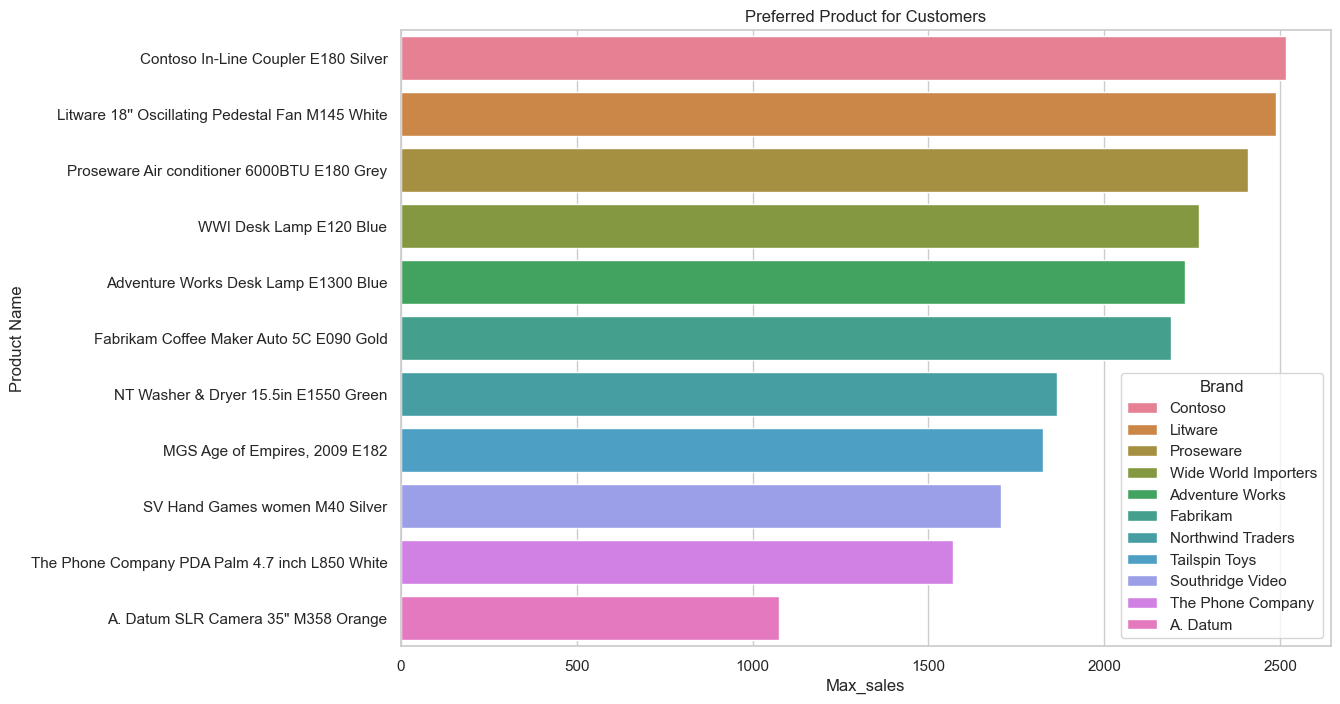

In [62]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(12, 8))
sns.barplot(data=preferred_products, x='Max_sales', y='Product Name', hue='Brand')
plt.title('Preferred Product for Customers')
plt.show()

#### 6. Segmentation

In [63]:
Segmentation=Sales_Customer_Product.groupby(['Category','Gender','Customer_Age','Country']).agg(Sales=('Order Number','count')).reset_index()
Segmentation.head()

,Category,Gender,Customer_Age,Country,Sales
0,Audio,Female,14.0,United Kingdom,1
1,Audio,Female,15.0,France,2
2,Audio,Female,15.0,Germany,2
3,Audio,Female,15.0,Italy,1
4,Audio,Female,15.0,Netherlands,1


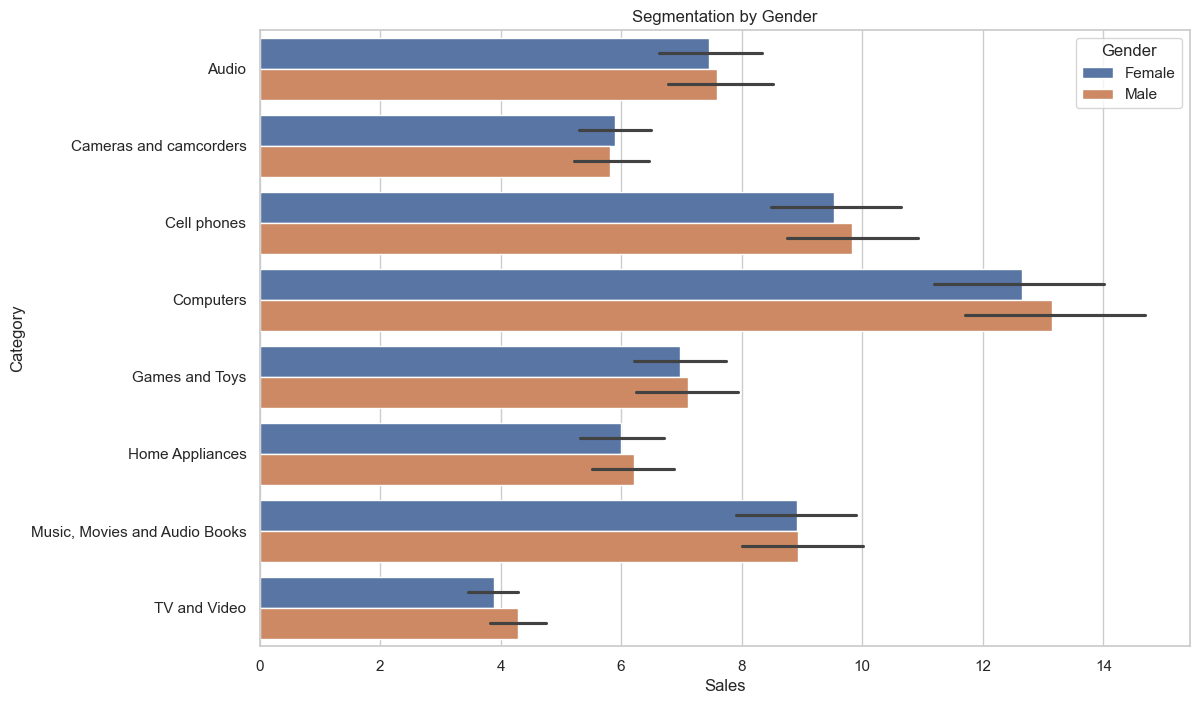

In [64]:
#segmentation by Gender
sns.set_theme(style='whitegrid')
plt.figure(figsize=(12, 8))
sns.barplot(data=Segmentation, x='Sales', y='Category', hue='Gender')
plt.title('Segmentation by Gender')
plt.show()

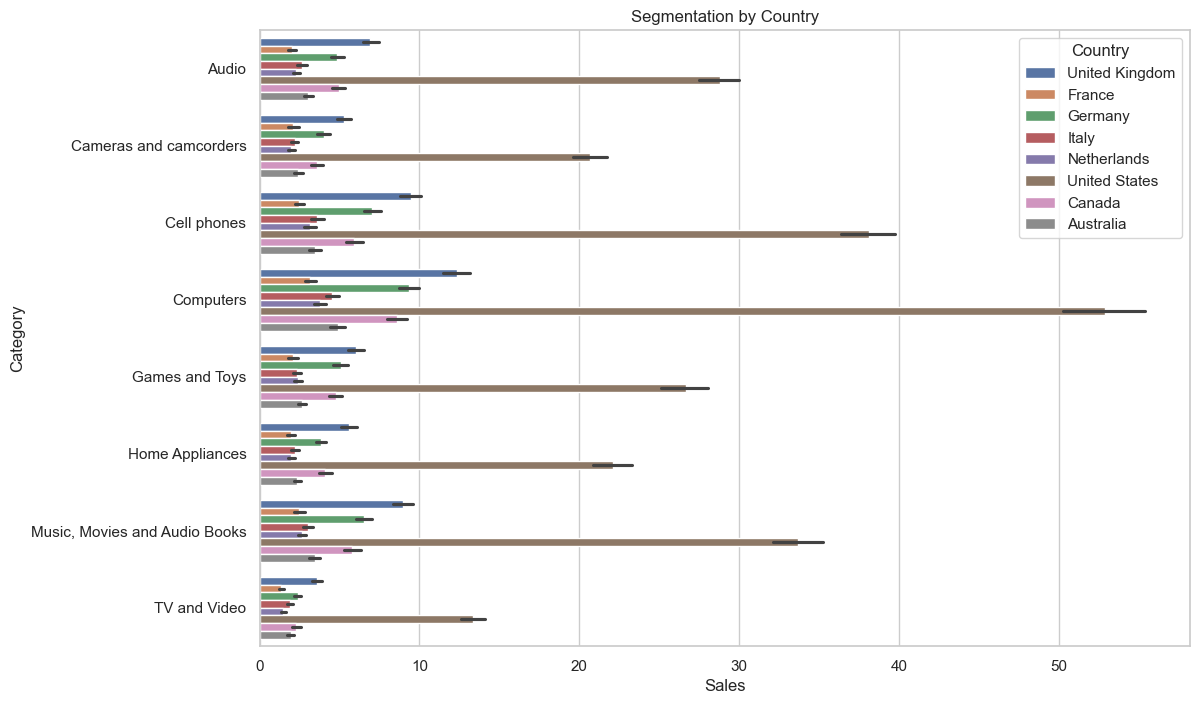

In [65]:
#segmentation by Country
sns.set_theme(style='whitegrid')
plt.figure(figsize=(12, 8))
sns.barplot(data=Segmentation, x='Sales', y='Category',hue='Country')
plt.title('Segmentation by Country')
plt.show()

## **3. Store Analysis**

#### 1. PerFormance Based on Store Sales, size, Open Date

In [66]:
#merge Tables for analysis
Store_Sales_Product=pd.merge(Stores_df,Sales_df,how='inner',on='StoreKey')
Store_Sales_Product=pd.merge(Store_Sales_Product,Products_df,how='inner',on='ProductKey')
Store_Sales_Product.head(1)

,StoreKey,Country,State,Square Meters,Open Date,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,...,Currency Code,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Australia,Australian Capital Territory,595.0,2008-01-01,518002,1,2016-06-01,0,126573,...,AUD,Contoso Home Theater System 5.1 Channel M1510 ...,Contoso,Brown,224.87,489.0,203,Home Theater System,2,TV and Video


<Figure size 2000x500 with 0 Axes>

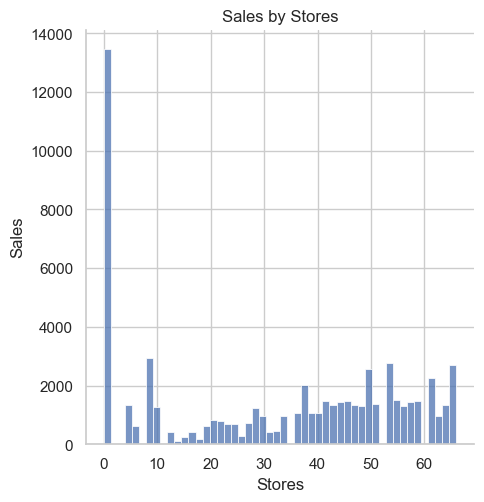

In [67]:
#Store Performance
sns.set_theme(style='whitegrid')
plt.figure(figsize=(20,5))
sns.displot(Store_Sales_Product,x='StoreKey',bins=50)
plt.title('Sales by Stores')
plt.xlabel('Stores')
plt.ylabel('Sales')
plt.show()

In [68]:
#Opendate
Store_Sales_Product['Order Date']=pd.to_datetime(Store_Sales_Product['Order Date'])
Store_Sales_Product['Open Date']=pd.to_datetime(Store_Sales_Product['Open Date'])
Store_Sales_Product['Store_Age']=(Store_Sales_Product['Order Date']-Store_Sales_Product['Open Date']).dt.days//365.25
Store_Sales_Product

,StoreKey,Country,State,Square Meters,Open Date,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,...,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Store_Age
0,1,Australia,Australian Capital Territory,595.0,2008-01-01,518002,1,2016-06-01,0,126573,...,Contoso Home Theater System 5.1 Channel M1510 ...,Contoso,Brown,224.87,489.00,203,Home Theater System,2,TV and Video,8.0
1,1,Australia,Australian Capital Territory,595.0,2008-01-01,518002,2,2016-06-01,0,126573,...,Proseware Screen 100in M1609 Black,Proseware,Black,87.37,190.00,305,Projectors & Screens,3,Computers,8.0
2,1,Australia,Australian Capital Territory,595.0,2008-01-01,518002,3,2016-06-01,0,126573,...,Contoso 32GB Video MP3 Player M3200 Orange,Contoso,Orange,84.49,255.00,101,MP4&MP3,1,Audio,8.0
3,1,Australia,Australian Capital Territory,595.0,2008-01-01,531006,1,2016-06-14,0,35257,...,Contoso Smart Battery M901 Blue,Contoso,Blue,5.29,11.50,308,Computers Accessories,3,Computers,8.0
4,1,Australia,Australian Capital Territory,595.0,2008-01-01,584001,1,2016-08-06,0,137865,...,Contoso Water Heater 7.2GPM X1800 Blue,Contoso,Blue,488.70,1475.00,804,Water Heaters,8,Home Appliances,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62879,0,Online,Online,NaN,2010-01-01,2243029,6,2021-02-20,2021-02-27,887764,...,The Phone Company Sharp Touch Screen Phones M9...,The Phone Company,Gold,138.42,301.00,503,Touch Screen Phones,5,Cell phones,11.0
62880,0,Online,Online,NaN,2010-01-01,2243031,1,2021-02-20,2021-02-24,511229,...,WWI Wireless Bluetooth Stereo Headphones M170 ...,Wide World Importers,Silver,55.18,120.00,106,Bluetooth Headphones,1,Audio,11.0
62881,0,Online,Online,NaN,2010-01-01,2243032,1,2021-02-20,2021-02-23,331277,...,SV DVD 7-Inch Player Portable E200 White,Southridge Video,White,56.08,109.99,602,Movie DVD,6,"Music, Movies and Audio Books",11.0
62882,0,Online,Online,NaN,2010-01-01,2243032,2,2021-02-20,2021-02-23,331277,...,MGS Flight Simulator X M250,Tailspin Toys,Pink,32.25,70.13,702,Download Games,7,Games and Toys,11.0


In [69]:
Sales_by_Store_age=Store_Sales_Product.groupby('Store_Age').agg(Sales=('Order Number','count')).reset_index()
Sales_by_Store_age

,Store_Age,Sales
0,0.0,1402
1,1.0,2251
2,2.0,2007
3,3.0,4000
4,4.0,5469
5,5.0,4668
6,6.0,6293
7,7.0,6173
8,8.0,7223
9,9.0,9853


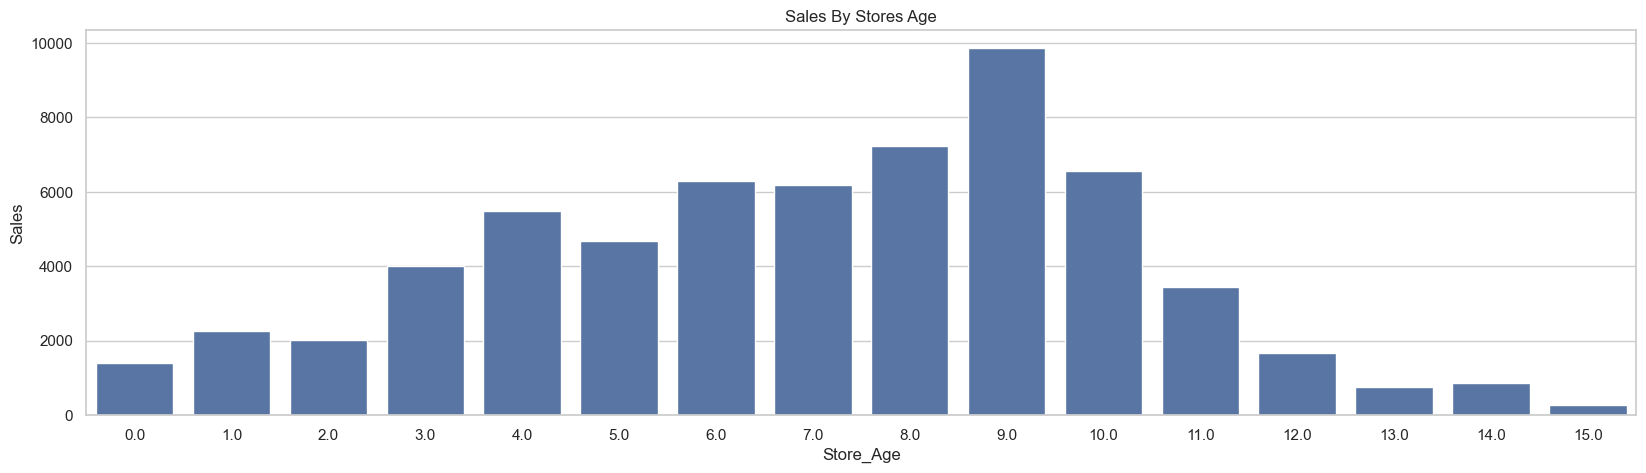

In [70]:
#Sales by Store's Age
plt.figure(figsize=(20,5))
sns.set_theme(style='whitegrid')
sns.barplot(Sales_by_Store_age,x='Store_Age',y='Sales')
plt.title('Sales By Stores Age')
plt.show()

In [71]:
#Sales by stores location
StoreKey_Country_grouped=Store_Sales_Product.groupby(['StoreKey','Country']).agg(Sales=('Order Number','count')).reset_index()
StoreKey_Country_grouped.head()

,StoreKey,Country,Sales
0,0,Online,13165
1,1,Australia,292
2,2,Australia,18
3,4,Australia,431
4,5,Australia,892


Text(0.5, 1.0, 'Sales by Store Location')

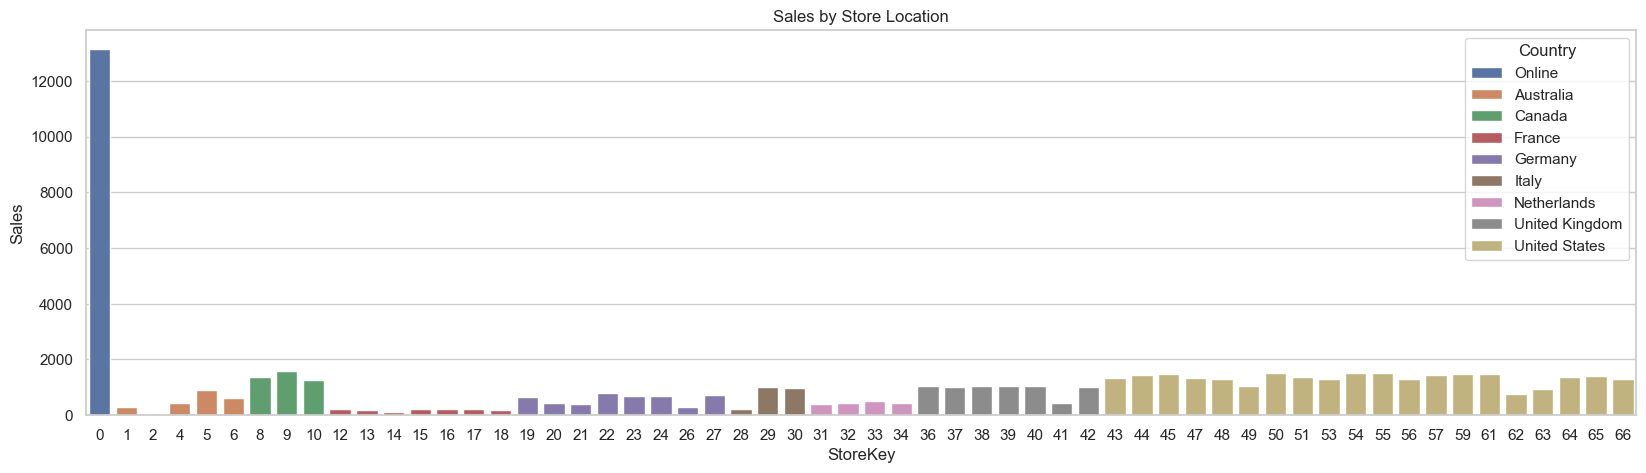

In [72]:
#Sales By Store Location
plt.figure(figsize=(20,5))
sns.barplot(StoreKey_Country_grouped,y='Sales',x='StoreKey',hue='Country')
plt.title('Sales by Store Location')

In [73]:
#Store Size depends on Sales
Square_meter=Store_Sales_Product.groupby('Square Meters').agg(Sales=('Order Number','count')).reset_index()
Square_meter.head(1)

,Square Meters,Sales
0,245.0,184


Text(0.5, 1.0, 'Sales by Store Size')

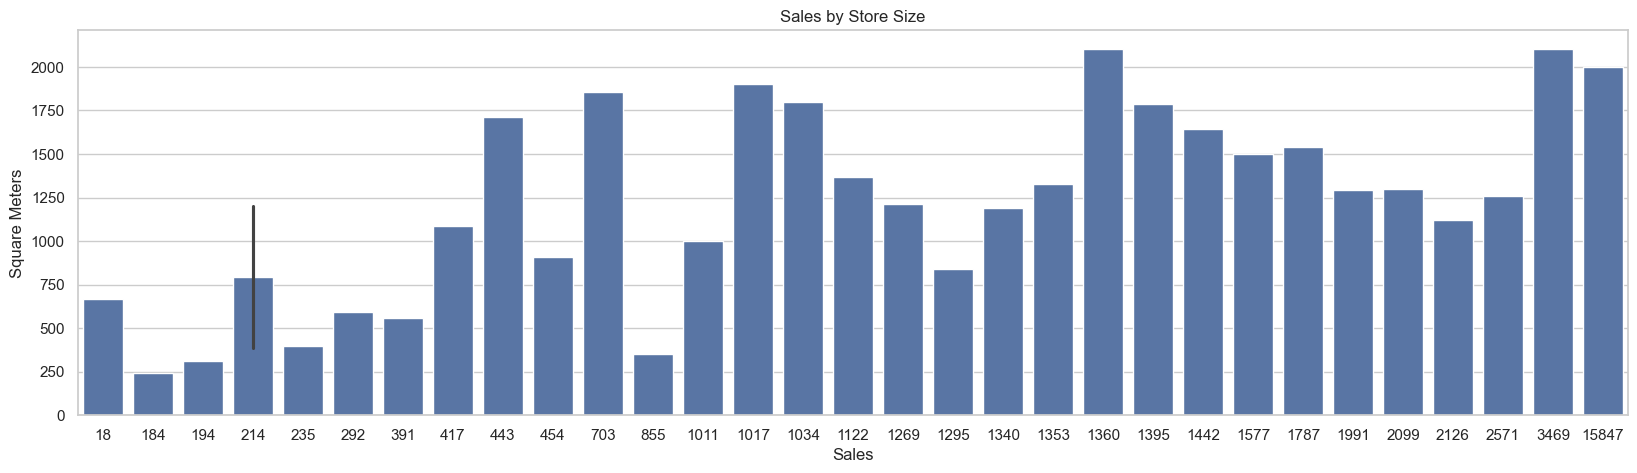

In [74]:
#Sales By Store size
plt.figure(figsize=(20,5))
sns.barplot(Square_meter,y='Square Meters',x='Sales')
plt.title('Sales by Store Size')

## **4. Sales Analysis**

#### 1. Overall Sales with trends

In [75]:
Sales_df.head(1)

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,2016-01-01,0,265598,10,1304,1,CAD


In [76]:
copy=Sales_df.copy()
copy

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,2016-01-01,0,265598,10,1304,1,CAD
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,0,1216913,43,632,3,USD
62880,2243031,1,2021-02-20,2021-02-24,511229,0,98,4,EUR
62881,2243032,1,2021-02-20,2021-02-23,331277,0,1613,2,CAD
62882,2243032,2,2021-02-20,2021-02-23,331277,0,1717,2,CAD


In [77]:
copy['Delivery Date']=pd.to_datetime(copy['Delivery Date'])

In [78]:
copy['Order_Month']=copy['Delivery Date'].dt.month

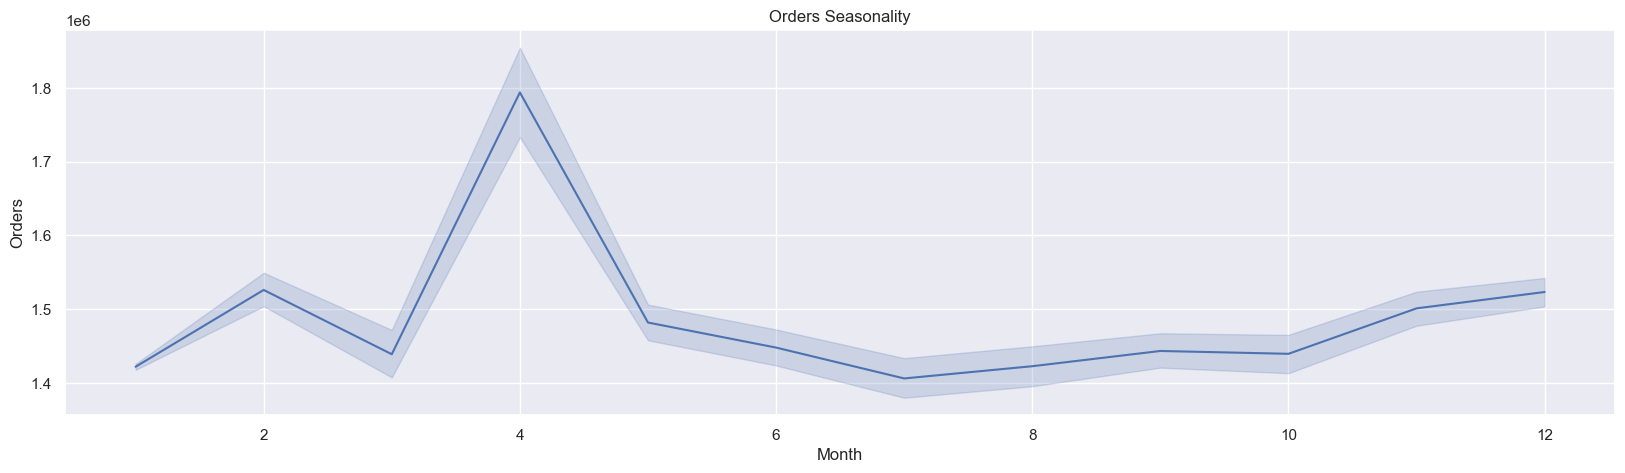

In [79]:
#Order by month
plt.figure(figsize=(20,5))
sns.set_theme(style='darkgrid')
sns.lineplot(copy,x='Order_Month',y='Order Number')
plt.ylabel('Orders')
plt.xlabel('Month')
plt.title('Orders Seasonality')
plt.show()

#### 2. Top product with revenue

In [80]:
Top_product =Sales_df[Sales_df['ProductKey']==Sales_df['ProductKey'].max()]
Top_product.head(1)

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
1533,428005,1,2016-03-03,0,1438477,63,2517,2,USD


In [81]:
Top_product_with_revenue=pd.merge(Top_product,Products_df,how='inner',on='ProductKey')
Top_product_with_revenue.head(1)

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,428005,1,2016-03-03,0,1438477,63,2517,2,USD,Contoso In-Line Coupler E180 Silver,Contoso,Silver,1.71,3.35,505,Cell phones Accessories,5,Cell phones


In [82]:
Top_product_with_revenue.groupby('Product Name').agg(Revenue=('Unit Price USD','sum')).reset_index()

,Product Name,Revenue
0,Contoso In-Line Coupler E180 Silver,164.15


# **3. Sql Part**

In [1]:
#Connection towards database
import mysql.connector # type: ignore
from tabulate import tabulate # type: ignore
connection = mysql.connector.connect(
  host="localhost",
  user="root",
  password="3802",
  #database='data_spark'  
)
cursor = connection.cursor(buffered=True)

In [84]:
cursor.execute("SHOW DATABASES")
print(tabulate(cursor.fetchall(),headers=[i[0] for i in cursor.description],  tablefmt='psql'))

+--------------------+
| Database           |
|--------------------|
| car_sales          |
| information_schema |
| mysql              |
| performance_schema |
| sakila             |
| sample             |
| sys                |
| world              |
+--------------------+


## 1. DB and Table creation

In [85]:
#create db
cursor.execute("CREATE DATABASE DATA_SPARK")
connection.commit()
cursor.execute("USE DATA_SPARK")
connection.commit()

In [86]:
Customers_df.head(1)

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03


In [87]:
#1. create Customer table
cursor.execute('''CREATE TABLE Customer (Customer_key int, Gender varchar(50), Name varchar(50), City varchar(50), State_code varchar(50), 
                  State varchar(50), Zip_code varchar(50), Country varchar(50), Continent varchar(50), Birthday date)''')
connection.commit()

In [88]:
Sales_df.head(1)

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,2016-01-01,0,265598,10,1304,1,CAD


In [89]:
#2. Create Sales table
cursor.execute('''CREATE TABLE sales(Order_number int, line_item int, Order_date date, delivery_date date, customer_key int, Store_key int,
                    Product_key int, Quantity int, Currency_code varchar(50))''')
connection.commit()

In [90]:
Products_df.head(1)

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101,MP4&MP3,1,Audio


In [91]:
#3. Create product table
cursor.execute('''CREATE TABLE Product(Product_key int, Product_name varchar(100), Brand varchar(200), Color varchar(250), Unit_cost_USD float, Unit_price_USD float,
               Subcategory_key int, Subcategory varchar(250), Category_key int, Category varchar(250) )''')
connection.commit()

In [92]:
Exchange_rates_df.head(1)

,Date,Currency,Exchange
0,2015-01-01,USD,1.0


In [93]:
#4. Create Exchange rate Table
cursor.execute('''CREATE TABLE Exchange_rates(Date date, Currency varchar(100), Exchange float)''')
connection.commit()

In [94]:
Stores_df.head(1)

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,2008-01-01


In [95]:
#5. Create stores table
cursor.execute('''CREATE TABLE Stores(Store_key int, Country varchar(250), State varchar(50), Square_meters float, Open_date date)''')
connection.commit()

## 2. Add values

In [96]:
#1. insert customer data
try:
    connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="3802",
    database='data_spark'  
    )
    cursor = connection.cursor(buffered=True)
    query_for_data_push = """INSERT INTO customer (Customer_key, Gender, Name, City, State_code, State, Zip_code, Country, Continent, Birthday) 
                             VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"""
    
    # Migrate all data into SQL using executemany
    cursor.executemany(query_for_data_push, Customers_df.values.tolist())
    connection.commit()
    print("Data inserted successfully!")

except mysql.connector.Error as err:
    print(f"Error: {err}")

Data inserted successfully!


In [107]:
#2. Insert sales data
try:
    connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="3802",
    database='data_spark'  
    )
    cursor = connection.cursor(buffered=True)
    query_for_data_push = """INSERT INTO sales (Order_number, Line_item, Order_date, Delivery_date,
                            Customer_key, Store_key, Product_key, Quantity, Currency_code) 
                             VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)"""
    
    # Migrate all data into SQL using executemany
    cursor.executemany(query_for_data_push, Sales_df.values.tolist())
    connection.commit()
    print("Data inserted successfully!")

except mysql.connector.Error as err:
    print(f"Error: {err}")

Data inserted successfully!


In [111]:
#3. Insert product data
try:
    connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="3802",
    database='data_spark'  
    )
    cursor = connection.cursor(buffered=True)
    query_for_data_push = """INSERT INTO product (Product_Key, Product_Name, Brand,	Color, Unit_Cost_USD, Unit_Price_USD,	
                            Subcategory_Key, Subcategory, Category_Key, Category) 
                             VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s,%s)"""
    
    # Migrate all data into SQL using executemany
    cursor.executemany(query_for_data_push, Products_df.values.tolist())
    connection.commit()
    print("Data inserted successfully!")

except mysql.connector.Error as err:
    print(f"Error: {err}")

Data inserted successfully!


In [ ]:
#4. Insert store data
try:
    connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="3802",
    database='data_spark'  
    )
    cursor = connection.cursor(buffered=True)
    query_for_data_push = """INSERT INTO stores (StoreKey, Country, State, Square_Meters, Open_Date) 
                             VALUES (%s, %s, %s, %s, %s)"""
    
    # Migrate all data into SQL using executemany
    cursor.executemany(query_for_data_push, Stores_df.values.tolist())
    connection.commit()
    print("Data inserted successfully!")

except mysql.connector.Error as err:
    print(f"Error: {err}")

Data inserted successfully!


In [118]:
#5. Insert exchange rates data
try:
    connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="3802",
    database='data_spark'  
    )
    cursor = connection.cursor(buffered=True)
    query_for_data_push = """INSERT INTO exchange_rates (Date, Currency, Exchange) 
                             VALUES (%s, %s, %s)"""
    
    # Migrate all data into SQL using executemany
    cursor.executemany(query_for_data_push, Exchange_rates_df.values.tolist())
    connection.commit()
    print("Data inserted successfully!")

except mysql.connector.Error as err:
    print(f"Error: {err}")

Data inserted successfully!


## 3. Sql queries for get info

In [ ]:
#1. Most purchased product 
cursor.execute(""" select product.product_name as Product, sum(sales.quantity) as Sales 
                from Sales
                inner join product
                where sales.product_key=product.product_key
                group by product.product_name
                order by Sales desc limit 1; """)

print(tabulate(cursor.fetchall(),headers=[i[0] for i in cursor.description],  tablefmt='psql'))

+--------------------------------+---------+
| Product                        |   Sales |
|--------------------------------+---------|
| WWI Desktop PC2.33 X2330 Black |     550 |
+--------------------------------+---------+


In [122]:
#2.Least purchased product
cursor.execute(""" select product.product_name as Product, sum(sales.quantity) as Sales 
                from Sales
                inner join product
                where sales.product_key=product.product_key
                group by product.product_name having Sales=1
                order by Sales asc; """)

print(tabulate(cursor.fetchall(),headers=[i[0] for i in cursor.description],  tablefmt='psql'))

+----------------------------------------------------+---------+
| Product                                            |   Sales |
|----------------------------------------------------+---------|
| Adventure Works Desk Lamp E1300 Black              |       1 |
| WWI Wall Lamp E315 White                           |       1 |
| WWI Floor Lamp M215 Grey                           |       1 |
| WWI Floor Lamp X115 Blue                           |       1 |
| Proseware Wall Lamp E0215 Blue                     |       1 |
| Proseware Floor Lamp X0115 Blue                    |       1 |
| Adventure Works Chandelier M8150 Silver            |       1 |
| Adventure Works Chandelier M8150 Black             |       1 |
| Proseware Chandelier M0815 Black                   |       1 |
| Litware 16" White Oscillating Stand Fan E701 White |       1 |
+----------------------------------------------------+---------+


In [ ]:
#3. Top 10 sold products
cursor.execute("""select product.product_name as Product, sum(sales.quantity) as Sales 
                    from Sales
                    inner join product
                    where sales.product_key=product.product_key
                    group by product.product_name
                    order by Sales desc limit 10;
                    """)
print(tabulate(cursor.fetchall(),headers=[i[0] for i in cursor.description],  tablefmt='psql'))

+--------------------------------------------+---------+
| Product                                    |   Sales |
|--------------------------------------------+---------|
| WWI Desktop PC2.33 X2330 Black             |     550 |
| WWI Desktop PC1.80 E1800 White             |     538 |
| Adventure Works Desktop PC1.60 ED160 Black |     521 |
| Adventure Works Desktop PC2.30 MD230 White |     521 |
| Adventure Works Desktop PC1.80 ED180 Black |     520 |
| Adventure Works Desktop PC2.30 MD230 Black |     514 |
| WWI Desktop PC1.60 E1600 Black             |     509 |
| WWI Desktop PC1.60 E1600 Silver            |     507 |
| Adventure Works Desktop PC1.60 ED160 White |     505 |
| WWI Desktop PC1.80 E1801 Black             |     505 |
+--------------------------------------------+---------+


In [123]:
#4. Top 10 Brands on Sales
cursor.execute(""" select product.brand as brand, sum(sales.quantity) as Sales 
                    from Sales
                    inner join product
                    where sales.product_key=product.product_key
                    group by product.brand
                    order by Sales desc limit 10;""")
print(tabulate(cursor.fetchall(),headers=[i[0] for i in cursor.description],  tablefmt='psql'))

+----------------------+---------+
| brand                |   Sales |
|----------------------+---------|
| Contoso              |   49827 |
| Wide World Importers |   27413 |
| Southridge Video     |   24814 |
| Adventure Works      |   20099 |
| The Phone Company    |   18764 |
| Tailspin Toys        |   17455 |
| Fabrikam             |   11384 |
| Proseware            |    9427 |
| Northwind Traders    |    7610 |
| A. Datum             |    5655 |
+----------------------+---------+


In [ ]:
#5. Top 10 customers
cursor.execute(""" select customer.name,customer.country as country,sum(sales.quantity) as sales from sales
                    inner join customer
                    on sales.customer_key=customer.customer_key
                    group by customer.name,customer.country
                    order by Sales desc limit 10;""")
print(tabulate(cursor.fetchall(),headers=[i[0] for i in cursor.description],  tablefmt='psql'))

+-------------------+---------------+---------+
| name              | country       |   sales |
|-------------------+---------------+---------|
| Gaspare Trevisan  | Italy         |     124 |
| Fabrice Lamoureux | United States |     123 |
| Vanessa Holzman   | Germany       |     107 |
| Martha Thornton   | United States |     103 |
| Richard Smith     | United States |     103 |
| Paul Warren       | United States |     100 |
| Claire Macdonald  | United States |      98 |
| Frances Colbert   | United States |      95 |
| Michael Hermes    | United States |      95 |
| David Breton      | United States |      95 |
+-------------------+---------------+---------+


In [126]:
#6. Top Countries on Sales
cursor.execute(""" select customer.country as country,sum(sales.quantity) as sales from sales
                    inner join customer
                    on sales.customer_key=customer.customer_key
                    group by customer.country
                    order by Sales desc limit 10;""")
print(tabulate(cursor.fetchall(),headers=[i[0] for i in cursor.description],  tablefmt='psql'))

+----------------+---------+
| country        |   sales |
|----------------+---------|
| United States  |  106407 |
| United Kingdom |   25298 |
| Germany        |   18943 |
| Canada         |   16793 |
| Australia      |    9209 |
| Italy          |    8384 |
| Netherlands    |    7252 |
| France         |    5385 |
+----------------+---------+


In [ ]:
#7. Most purchased product based on gender
cursor.execute(""" with customer_sales as (
	select customer.gender,sales.product_key,sum(sales.quantity) as sales from sales
	inner join customer
	on sales.customer_key=customer.customer_key
	group by customer.gender,sales.Product_key
	order by Sales desc limit 10)
    
    select customer_sales.gender,product.Product_name,customer_sales.sales 
    from product
    inner join customer_sales
    on customer_sales.product_key=product.Product_key
    order by customer_sales.sales desc""")
print(tabulate(cursor.fetchall(),headers=[i[0] for i in cursor.description],  tablefmt='psql'))

+----------+---------------------------------------------+---------+
| gender   | Product_name                                |   sales |
|----------+---------------------------------------------+---------|
| Male     | WWI Desktop PC2.33 X2330 Black              |     318 |
| Female   | Adventure Works Desktop PC1.80 ED180 White  |     311 |
| Female   | WWI Desktop PC1.60 E1600 Silver             |     295 |
| Female   | WWI Desktop PC1.80 E1801 Black              |     284 |
| Female   | WWI Desktop PC1.80 E1800 White              |     281 |
| Male     | WWI Desktop PC2.33 X2330 White              |     280 |
| Female   | Adventure Works Desktop PC1.80 ED180 Silver |     275 |
| Male     | Adventure Works Desktop PC2.30 MD230 Black  |     273 |
| Male     | Adventure Works Desktop PC3.0 MS300 Black   |     272 |
| Male     | Adventure Works Desktop PC1.80 ED180 Black  |     269 |
+----------+---------------------------------------------+---------+


In [ ]:
#8. Top 10 Stores performance by Sales
cursor.execute(""" select  stores.store_key, stores.country,sum(sales.Quantity) as Sales
                    from stores
                    inner join
                    sales on stores.store_key=sales.Store_key
                    group by stores.Store_key,stores.country
                    order by sales desc limit 10;
""")
print(tabulate(cursor.fetchall(),headers=[i[0] for i in cursor.description],  tablefmt='psql'))

+-------------+---------------+---------+
|   store_key | country       |   Sales |
|-------------+---------------+---------|
|           0 | Online        |   41311 |
|           9 | Canada        |    4894 |
|          55 | United States |    4826 |
|          50 | United States |    4773 |
|          61 | United States |    4771 |
|          54 | United States |    4686 |
|          59 | United States |    4674 |
|          45 | United States |    4672 |
|          44 | United States |    4581 |
|          65 | United States |    4524 |
+-------------+---------------+---------+


In [133]:
#9. Top 10 Age Category by Sales
cursor.execute(""" SELECT 
                round(DATEDIFF(sales.Order_date, customer.Birthday) / 365.25) AS customer_age, sum(sales.Quantity) as Total_Sales
            FROM 
                sales
            INNER JOIN 
                customer ON sales.customer_key = customer.customer_key
            group by customer_age
            order by Total_sales desc limit 10
""")
print(tabulate(cursor.fetchall(),headers=[i[0] for i in cursor.description],  tablefmt='psql'))

+----------------+---------------+
|   customer_age |   Total_Sales |
|----------------+---------------|
|             39 |          3437 |
|             20 |          3407 |
|             53 |          3401 |
|             37 |          3267 |
|             63 |          3254 |
|             30 |          3252 |
|             70 |          3239 |
|             73 |          3216 |
|             68 |          3206 |
|             33 |          3164 |
+----------------+---------------+


In [134]:
#10. Top 10 sold Products on Online
cursor.execute(""" select stores.country as Store, Product.product_name as Product, sum(sales.Quantity) as Sales
                    from sales
                    inner join stores on sales.Store_key=stores.Store_key
                    inner join product on sales.Product_key=product.Product_key
                    group by Store, Product having Store='Online'
                    order by Sales desc limit 10; 

""")
print(tabulate(cursor.fetchall(),headers=[i[0] for i in cursor.description],  tablefmt='psql'))

+---------+---------------------------------------------+---------+
| Store   | Product                                     |   Sales |
|---------+---------------------------------------------+---------|
| Online  | WWI Desktop PC2.33 X2330 Black              |     167 |
| Online  | Adventure Works Desktop PC2.30 MD230 White  |     152 |
| Online  | Adventure Works Desktop PC2.33 XD233 Brown  |     145 |
| Online  | MGS Hand Games men M300 Red                 |     144 |
| Online  | Adventure Works Desktop PC1.80 ED180 Silver |     137 |
| Online  | WWI Desktop PC1.60 E1600 Red                |     127 |
| Online  | Adventure Works Desktop PC1.80 ED182 Silver |     126 |
| Online  | SV DVD 12-Inch Player Portable M400 White   |     122 |
| Online  | Adventure Works Desktop PC2.30 MD230 Black  |     121 |
| Online  | WWI Desktop PC1.80 E1801 Brown              |     117 |
+---------+---------------------------------------------+---------+


In [3]:
#11. Relation between Exchage rates and product price
cursor.execute(""" SELECT 
    COUNT(sales.order_number) AS Total_Orders, 
    SUM(sales.quantity) AS Total_Units, 
    SUM(ROUND((sales.quantity * product.unit_cost_usd), 2)) AS Total_Product_Cost,
    SUM(ROUND((sales.quantity * product.unit_price_usd), 2)) AS Total_Product_Price,
    SUM(ROUND((sales.quantity * product.unit_price_usd), 2)) - SUM(ROUND((sales.quantity * product.unit_cost_usd), 2)) AS Profit_Without_Exchange,
    SUM(ROUND(sales.quantity * (product.unit_price_usd + exchange_rates.exchange), 2)) - SUM(ROUND((sales.quantity * product.unit_cost_usd), 2)) AS Profit_With_Exchange,
    SUM(ROUND(sales.quantity * (product.unit_price_usd + exchange_rates.exchange), 2)) AS Total_Sales_Amount_With_Exchange
FROM sales
INNER JOIN exchange_rates
    ON sales.currency_code = exchange_rates.currency
    AND sales.order_date = exchange_rates.Date
INNER JOIN product
    ON product.product_key = sales.product_key;
""")
print(tabulate(cursor.fetchall(),headers=[i[0] for i in cursor.description],  tablefmt='psql'))

+----------------+---------------+----------------------+-----------------------+---------------------------+------------------------+------------------------------------+
|   Total_Orders |   Total_Units |   Total_Product_Cost |   Total_Product_Price |   Profit_Without_Exchange |   Profit_With_Exchange |   Total_Sales_Amount_With_Exchange |
|----------------+---------------+----------------------+-----------------------+---------------------------+------------------------+------------------------------------|
|          62884 |        197757 |          2.30928e+07 |           5.57555e+07 |               3.26627e+07 |            3.28589e+07 |                        5.59517e+07 |
+----------------+---------------+----------------------+-----------------------+---------------------------+------------------------+------------------------------------+
